In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(5600, 128, 128) (5600,)


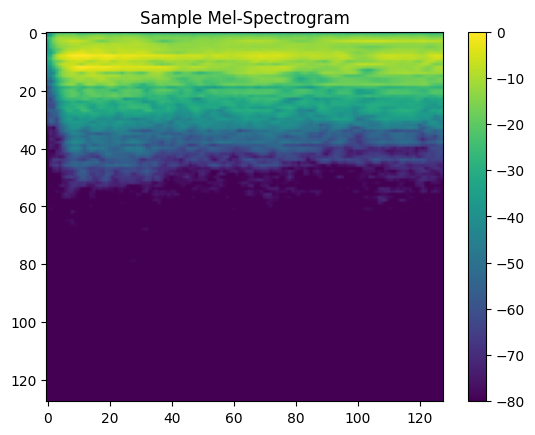

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

X = np.load('/content/drive/MyDrive/MusicProject/Processed/X.npy')
y = np.load('/content/drive/MyDrive/MusicProject/Processed/y.npy')

print(X.shape, y.shape)

plt.imshow(X[0], aspect='auto')
plt.colorbar()
plt.title("Sample Mel-Spectrogram")
plt.show()


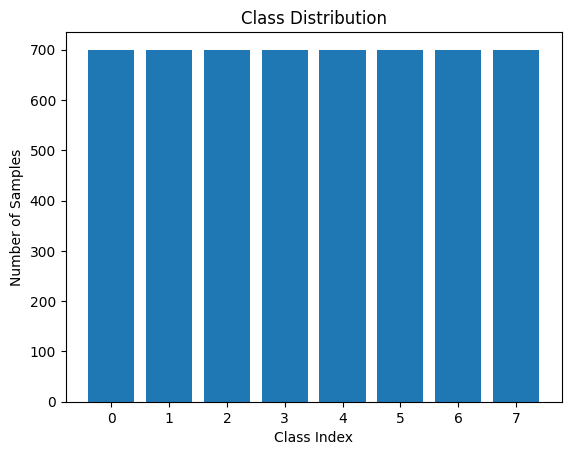

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()


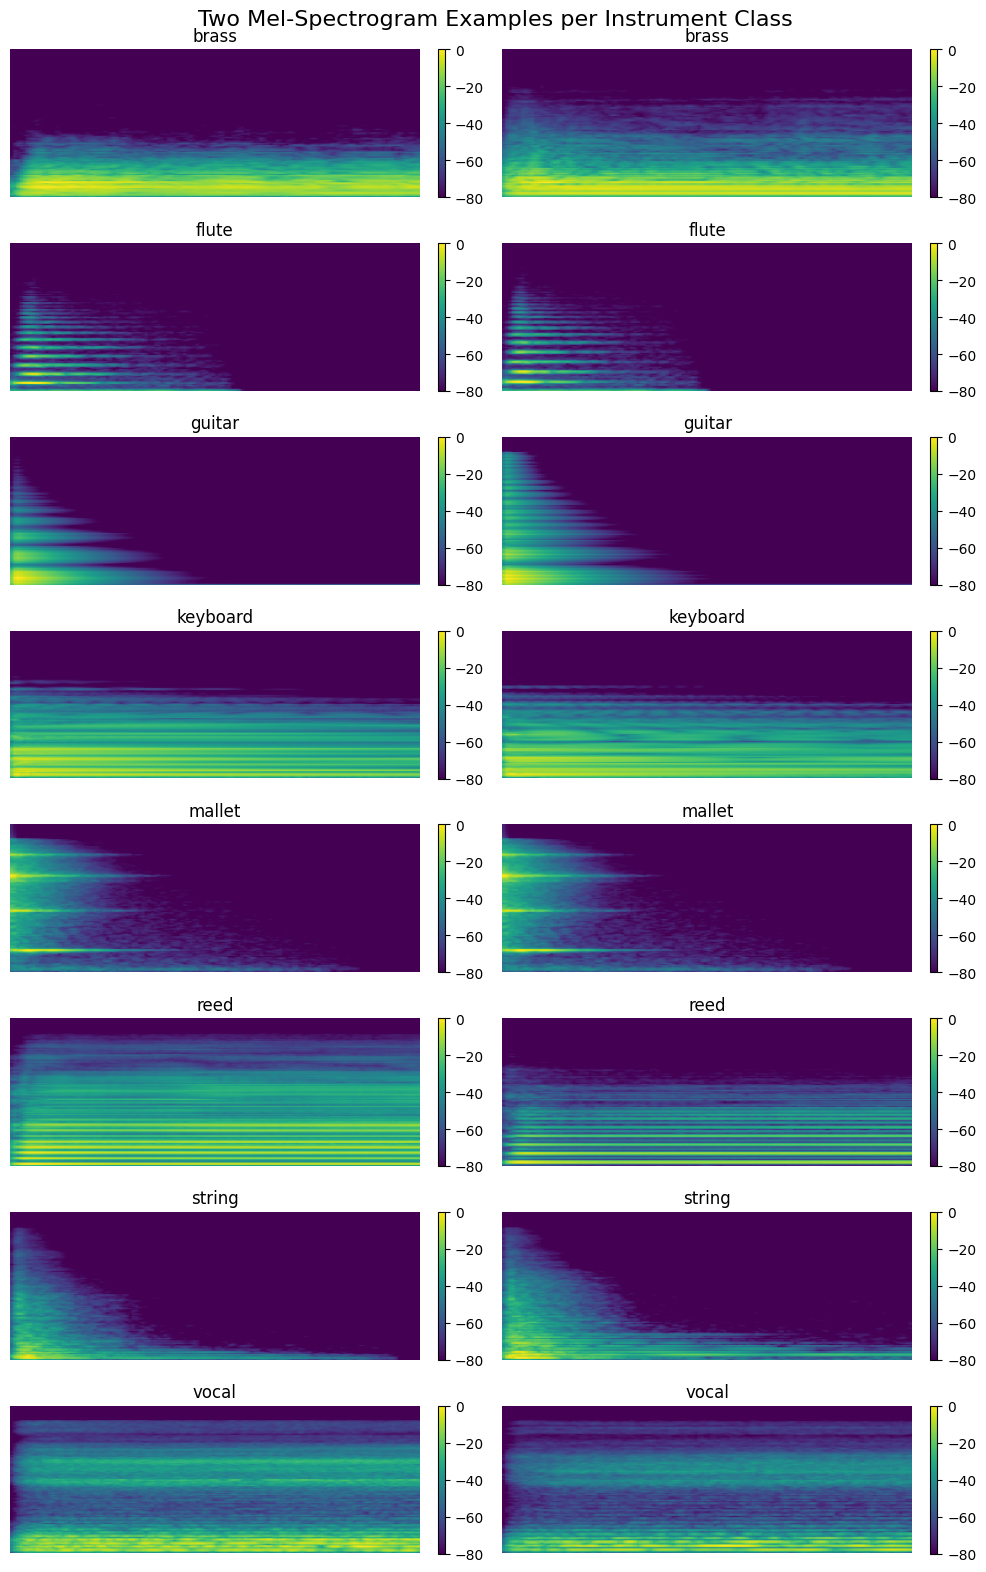

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load data (already loaded if you ran earlier cells)
X = np.load('/content/drive/MyDrive/MusicProject/Processed/X.npy')
y = np.load('/content/drive/MyDrive/MusicProject/Processed/y.npy')

with open('/content/drive/MyDrive/MusicProject/Processed/label_map.json') as f:
    label_map = json.load(f)

# Reverse label map: index -> class name
inv_label_map = {v: k for k, v in label_map.items()}

classes = sorted(inv_label_map.keys())

plt.figure(figsize=(10, 16))

plot_idx = 1
for cls in classes:
    # get indices of samples belonging to this class
    indices = np.where(y == cls)[0][:2]  # take first 2 samples

    for i in indices:
        plt.subplot(len(classes), 2, plot_idx)
        plt.imshow(X[i], aspect='auto', origin='lower')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.title(f"{inv_label_map[cls]}")
        plt.axis('off')
        plot_idx += 1

plt.suptitle("Two Mel-Spectrogram Examples per Instrument Class", fontsize=16)
plt.tight_layout()
plt.show()
